In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur
import matplotlib.pyplot as plt
import awkward as ak
import vector
import scienceplots
plt.style.use(['science','notebook', 'grid'])

# ------------------------------------------------BP1------------------------------------------------------------

# 1) Loading Signal Data 

In [2]:
df_a0a0 = pd.read_pickle("/home/chandrima/IDM_MuC/Results_new/IDMsig_a0a0_BP1_dist.pkl")
df_h0h0 = pd.read_pickle("/home/chandrima/IDM_MuC/Results_new/IDMsig_h0h0_BP1_dist.pkl")
df_hphm = pd.read_pickle("/home/chandrima/IDM_MuC/Results_new/IDMsig_hphm_BP1_dist.pkl")

# 2) Loading Background Data

In [3]:
df_nunu = pd.read_pickle("/home/chandrima/IDM_MuC/Results_new/IDM_BKG_nunu_dist.pkl")
df_wpwm = pd.read_pickle("/home/chandrima/IDM_MuC/Results_new/IDM_BKG_wpwm_dist.pkl")
df_zz = pd.read_pickle("/home/chandrima/IDM_MuC/Results_new/IDM_BKG_zz_dist.pkl")
df_h = pd.read_pickle("/home/chandrima/IDM_MuC/Results_new/IDM_BKG_higgs_dist.pkl")

# ------------------------------------------------Scaling------------------------------------------------------------

In [161]:
df_a0a0

,Invariant_Mass,MIM,fmeta,del_fmeta,del_phi,delR_fm,Emin_fm,Emax_fm,totE_fm,PT_fm,MET
0,5355.638368,3988.365468,"[-3.2711713314056396, 3.5160105228424072]",6.787182,0.757538,6.829327,1953.482056,3685.308105,5638.790161,372.313281,372.313281
1,4813.617538,3947.300333,"[-2.5073304176330566, 4.9471635818481445]",7.454494,0.869196,7.504997,1507.002808,3872.483887,5379.486694,282.627026,282.627026
2,5061.845535,3831.077299,"[3.335498332977295, -2.7982332706451416]",6.133732,1.476814,6.309013,1654.282471,3892.973877,5547.256348,356.897081,356.897081
3,7922.668081,1659.771491,"[3.4323465824127197, -3.374143123626709]",6.806490,2.604321,7.287715,3447.484375,4553.207031,8000.691406,151.351594,151.351594
4,6898.632903,722.505009,"[2.779026508331299, -4.007915019989014]",6.786942,2.972525,7.409351,2364.969482,5040.687988,7405.657471,116.235069,116.235069
...,...,...,...,...,...,...,...,...,...,...,...
4492629,7142.283517,2446.461284,"[-3.2322068214416504, 4.91914176940918]",8.151349,2.223709,8.449223,3012.163086,4239.188965,7251.352051,205.754552,205.754552
4492630,8429.647747,1414.875010,"[2.65246319770813, -4.462693691253662]",7.115157,2.424941,7.517034,4055.541016,4397.313477,8452.854492,496.850950,496.850950
4492631,6286.929013,2021.529108,"[3.305361747741699, -3.279949188232422]",6.585311,0.691798,6.621548,2147.006836,4624.937988,6771.944824,474.445002,474.445002
4492632,5603.664507,3972.387758,"[3.8482062816619873, -3.4650990962982178]",7.313305,1.778669,7.526493,2186.386719,3594.672852,5781.059570,183.004431,183.004431


### Signal Scaling

In [163]:
len(df_a0a0)

4492634

In [164]:
# sf_a0a0_1 = (5.13e-04*10000)/5000000
# sf_a0a0_2 = (2.32e-04*10000)/5000000
# sf_h0h0_1 = (5.182e-04*10000)/5000000
# sf_h0h0_2 = (2.38e-04*10000)/5000000
# sf_hphm_1 = (2.124e-02*10000)/5000000
# sf_hphm_2 = (9.691e-03*10000)/5000000
sf_a0a0_1 = 1/len(df_a0a0)
sf_a0a0_2 = 1/len(df_a0a0)
sf_h0h0_1 = 1/len(df_h0h0)
sf_h0h0_2 = 1/len(df_a0a0)
sf_hphm_1 = 1/len(df_hphm)
sf_hphm_2 = 1/len(df_hphm)

### Background Scaling

In [165]:
# sf_nunu = (153.0*10000)/10000000
# sf_wpwm = (140.2*10000)/10000000
# sf_zz = (0.0115*10000)/10000000
# sf_h = (3.82e-04*10000)/10000000
sf_nunu = 1/len(df_nunu)
sf_wpwm = 1/len(df_wpwm)
sf_zz = 1/len(df_zz)
sf_h = 1/len(df_h)

# ---------------------------------------------Plotting-----------------------------------------------------------

 # 1) Invariant Mass ($M_{\mu\mu})$

In [166]:
bin1 = 50
min1 = 1000
max1 = 10000

In [ ]:
a0a0_invM = np.array(df_a0a0['Invariant_Mass'])
counts_a0a0_invM, bins_a0a0_invM = np.histogram(a0a0_invM, bins=bin1, range = (min1,max1))
weights_a0a0_invM = sf_a0a0_1 * counts_a0a0_invM

h0h0_invM = np.array(df_h0h0['Invariant_Mass'])
counts_h0h0_invM, bins_h0h0_invM = np.histogram(h0h0_invM, bins=bin1, range = (min1,max1))
weights_h0h0_invM = sf_h0h0_1 * counts_h0h0_invM

hphm_invM = np.array(df_hphm['Invariant_Mass'])
counts_hphm_invM, bins_hphm_invM = np.histogram(hphm_invM, bins=bin1, range = (min1,max1))
weights_hphm_invM = sf_hphm_1 * counts_hphm_invM

In [168]:
np.sum(counts_a0a0_invM)

4492634

In [ ]:
signal_weights__invM = (counts_a0a0_invM + counts_h0h0_invM + counts_hphm_invM)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [241]:

nunu_invM = np.array(df_nunu['Invariant_Mass'])
counts_nunu_invM, bins_nunu_invM = np.histogram(nunu_invM, bins=bin1, range = (min1,max1))
weights_nunu_invM = sf_nunu * counts_nunu_invM

wpwm_invM = np.array(df_wpwm['Invariant_Mass'])
counts_wpwm_invM, bins_wpwm_invM = np.histogram(wpwm_invM, bins=bin1, range = (min1,max1))
weights_wpwm_invM = sf_wpwm * counts_wpwm_invM

zz_invM = np.array(df_zz['Invariant_Mass'])
counts_zz_invM, bins_zz_invM = np.histogram(zz_invM, bins=bin1, range = (min1,max1))
weights_zz_invM = sf_zz * counts_zz_invM

h_invM = np.array(df_h['Invariant_Mass'])
counts_h_invM, bins_h_invM = np.histogram(h_invM, bins=bin1, range = (min1,max1))
weights_h_invM = sf_h * counts_h_invM

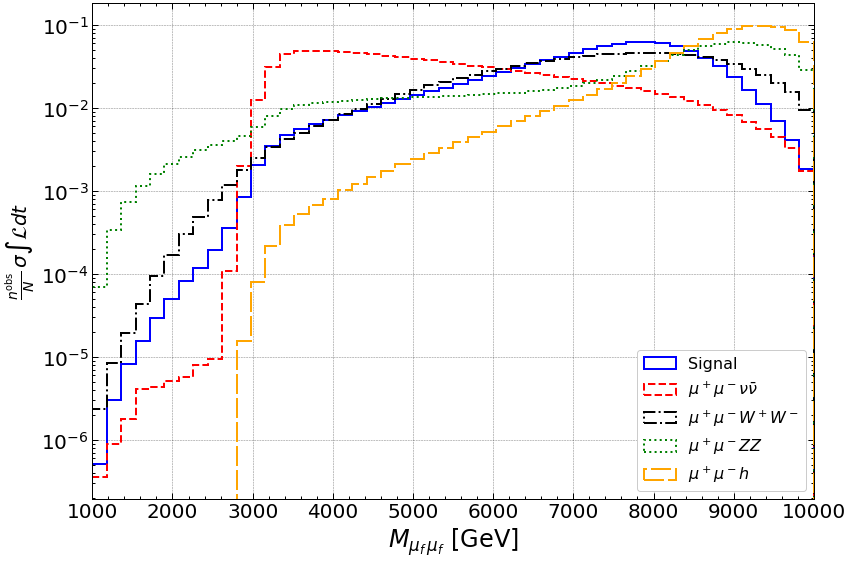

In [242]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_invM[:-1], bins_a0a0_invM, weights=signal_weights__invM, histtype='step',
         color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_invM[:-1], bins_nunu_invM, weights=weights_nunu_invM, histtype='step', 
         color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')
plt.hist(bins_wpwm_invM[:-1], bins_wpwm_invM, weights=weights_wpwm_invM, histtype='step', 
         color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')
plt.hist(bins_zz_invM[:-1], bins_zz_invM, weights=weights_zz_invM, histtype='step', 
         color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')
plt.hist(bins_h_invM[:-1], bins_h_invM, weights=weights_h_invM, histtype='step', 
         color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')


plt.xlabel("$M_{\mu_f \, \mu_f}$ [GeV]", fontsize=24)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)
# plt.title("Signal and Background Distributions", fontsize=16)

plt.yscale('log')
plt.xlim(1000, 10000) 

#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16, loc='best')
#plt.grid(False) 

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

In [243]:
signal_weights__invM.sum()

0.9999999999999999

## 2) MIM 

In [172]:
bin2 = 50
min2 = 0
max2 = 9000

In [173]:
a0a0_MIM = np.array(df_a0a0['MIM'])
counts_a0a0_MIM, bins_a0a0_MIM = np.histogram(a0a0_MIM, bins=bin2, range = (min2,max2))
weights_a0a0_MIM = sf_a0a0_1 * counts_a0a0_MIM

h0h0_MIM = np.array(df_h0h0['MIM'])
counts_h0h0_MIM, bins_h0h0_MIM = np.histogram(h0h0_MIM, bins=bin2, range = (min2,max2))
weights_h0h0_MIM = sf_h0h0_1 * counts_h0h0_MIM

hphm_MIM = np.array(df_hphm['MIM'])
counts_hphm_MIM, bins_hphm_MIM = np.histogram(hphm_MIM, bins=bin2, range = (min2,max2))
weights_hphm_MIM = sf_hphm_1 * counts_hphm_MIM

In [244]:
signal_weights__MIM = (counts_a0a0_MIM + counts_h0h0_MIM + counts_hphm_MIM)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [245]:
nunu_MIM = np.array(df_nunu['MIM'])
counts_nunu_MIM, bins_nunu_MIM = np.histogram(nunu_MIM, bins=bin2, range = (min2,max2))
weights_nunu_MIM = sf_nunu * counts_nunu_MIM

wpwm_MIM = np.array(df_wpwm['MIM'])
counts_wpwm_MIM, bins_wpwm_MIM = np.histogram(wpwm_MIM, bins=bin2, range = (min2,max2))
weights_wpwm_MIM = sf_wpwm * counts_wpwm_MIM

zz_MIM = np.array(df_zz['MIM'])
counts_zz_MIM, bins_zz_MIM = np.histogram(zz_MIM, bins=bin2, range = (min2,max2))
weights_zz_MIM = sf_zz * counts_zz_MIM

h_MIM = np.array(df_h['MIM'])
counts_h_MIM, bins_h_MIM = np.histogram(h_MIM, bins=bin2, range = (min2,max2))
weights_h_MIM = sf_h * counts_h_MIM

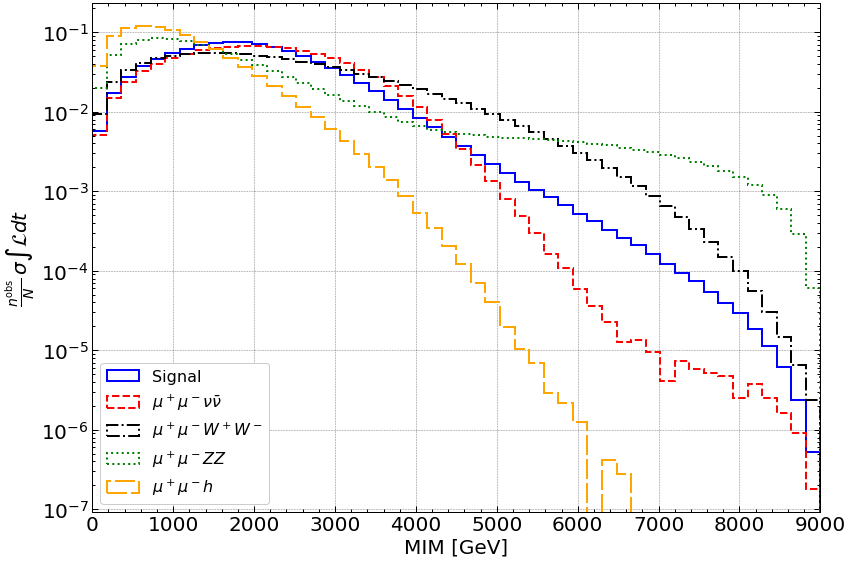

In [246]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_MIM[:-1], bins_a0a0_MIM, weights=signal_weights__MIM, histtype='step', 
         color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_MIM[:-1], bins_nunu_MIM, weights=weights_nunu_MIM, histtype='step', 
         color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')
plt.hist(bins_wpwm_MIM[:-1], bins_wpwm_MIM, weights=weights_wpwm_MIM, histtype='step', 
         color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')
plt.hist(bins_zz_MIM[:-1], bins_zz_MIM, weights=weights_zz_MIM, histtype='step', 
         color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')
plt.hist(bins_h_MIM[:-1], bins_h_MIM, weights=weights_h_MIM, histtype='step', 
         color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel("MIM [GeV]", fontsize=20)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)
# plt.title("Signal and Background Distributions", fontsize=18)

plt.yscale('log')
plt.xlim(0, 9000) 

#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16, loc='best')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

# 3) $\eta$

In [247]:
bin3 = 50
min3 = -9.0
max3 = 9.0

In [178]:
a0a0_fmeta = np.array(df_a0a0['fmeta'].tolist())
a0a0_fmeta_1 = a0a0_fmeta[:,0]
a0a0_fmeta_2 = a0a0_fmeta[:,1]

# a0a0_fmeta_1 = a0a0_fmeta_1[a0a0_fmeta_1 > 0]
# a0a0_fmeta_2 = a0a0_fmeta_2[a0a0_fmeta_2 > 0]

counts_a0a0_fmeta_1, bins_a0a0_fmeta_1 = np.histogram(a0a0_fmeta_1, bins=bin3, range = (min3, max3))
weights_a0a0_fmeta_1 = sf_a0a0_1 * counts_a0a0_fmeta_1

counts_a0a0_fmeta_2, bins_a0a0_fmeta_2 = np.histogram(a0a0_fmeta_2, bins=bin3, range = (min3, max3))
weights_a0a0_fmeta_2 = sf_a0a0_1 * counts_a0a0_fmeta_2

In [179]:
h0h0_fmeta = np.array(df_h0h0['fmeta'].tolist())
h0h0_fmeta_1 = h0h0_fmeta[:,0]
h0h0_fmeta_2 = h0h0_fmeta[:,1]

# h0h0_fmeta_1 = h0h0_fmeta_1[h0h0_fmeta_1 > 0]
# h0h0_fmeta_2 = h0h0_fmeta_2[h0h0_fmeta_2 > 0]

counts_h0h0_fmeta_1, bins_h0h0_fmeta_1 = np.histogram(h0h0_fmeta_1, bins=bin3, range = (min3, max3))
weights_h0h0_fmeta_1 = sf_h0h0_1 * counts_h0h0_fmeta_1

counts_h0h0_fmeta_2, bins_h0h0_fmeta_2 = np.histogram(h0h0_fmeta_2, bins=bin3, range = (min3, max3))
weights_h0h0_fmeta_2 = sf_h0h0_1 * counts_h0h0_fmeta_2

In [180]:
hphm_fmeta = np.array(df_hphm['fmeta'].tolist())
hphm_fmeta_1 = hphm_fmeta[:,0]
hphm_fmeta_2 = hphm_fmeta[:,1]

# hphm_fmeta_1 = hphm_fmeta_1[hphm_fmeta_1 > 0]
# hphm_fmeta_2 = hphm_fmeta_2[hphm_fmeta_2 > 0]

counts_hphm_fmeta_1, bins_hphm_fmeta_1 = np.histogram(hphm_fmeta_1, bins=bin3, range = (min3, max3))
weights_hphm_fmeta_1 = sf_hphm_1 * counts_hphm_fmeta_1

counts_hphm_fmeta_2, bins_hphm_fmeta_2 = np.histogram(hphm_fmeta_2, bins=bin3, range = (min3, max3))
weights_hphm_fmeta_2 = sf_hphm_1 * counts_hphm_fmeta_2

In [248]:
signal_weights_fmeta_1 = (counts_a0a0_fmeta_1 + counts_h0h0_fmeta_1 + counts_hphm_fmeta_1)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))

signal_weights_fmeta_2 = (counts_a0a0_fmeta_2 + counts_h0h0_fmeta_2 + counts_hphm_fmeta_2)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [249]:
nunu_fmeta = np.array(df_nunu['fmeta'].tolist())
nunu_fmeta_1 = nunu_fmeta[:,0]
nunu_fmeta_2 = nunu_fmeta[:,1]

# nunu_fmeta_1 = nunu_fmeta_1[nunu_fmeta_1 > 0]
# nunu_fmeta_2 = nunu_fmeta_2[nunu_fmeta_2 > 0]

counts_nunu_fmeta_1, bins_nunu_fmeta_1 = np.histogram(nunu_fmeta_1, bins=bin3, range = (min3, max3))
weights_nunu_fmeta_1 = sf_nunu * counts_nunu_fmeta_1

counts_nunu_fmeta_2, bins_nunu_fmeta_2 = np.histogram(nunu_fmeta_2, bins=bin3, range = (min3, max3))
weights_nunu_fmeta_2 = sf_nunu * counts_nunu_fmeta_2

In [250]:
wpwm_fmeta = np.array(df_wpwm['fmeta'].tolist())
wpwm_fmeta_1 = wpwm_fmeta[:,0]
wpwm_fmeta_2 = wpwm_fmeta[:,1]

# wpwm_fmeta_1 = wpwm_fmeta_1[wpwm_fmeta_1 > 0]
# wpwm_fmeta_2 = wpwm_fmeta_2[wpwm_fmeta_2 > 0]

counts_wpwm_fmeta_1, bins_wpwm_fmeta_1 = np.histogram(wpwm_fmeta_1, bins=bin3, range = (min3, max3))
weights_wpwm_fmeta_1 = sf_wpwm * counts_wpwm_fmeta_1

counts_wpwm_fmeta_2, bins_wpwm_fmeta_2 = np.histogram(wpwm_fmeta_2, bins=bin3, range = (min3, max3))
weights_wpwm_fmeta_2 = sf_wpwm * counts_wpwm_fmeta_2

In [251]:
zz_fmeta = np.array(df_zz['fmeta'].tolist())
zz_fmeta_1 = zz_fmeta[:,0]
zz_fmeta_2 = zz_fmeta[:,1]

# zz_fmeta_1 = zz_fmeta_1[zz_fmeta_1 > 0]
# zz_fmeta_2 = zz_fmeta_2[zz_fmeta_2 > 0]

counts_zz_fmeta_1, bins_zz_fmeta_1 = np.histogram(zz_fmeta_1, bins=bin3, range = (min3, max3))
weights_zz_fmeta_1 = sf_zz * counts_zz_fmeta_1

counts_zz_fmeta_2, bins_zz_fmeta_2 = np.histogram(zz_fmeta_2, bins=bin3, range = (min3, max3))
weights_zz_fmeta_2 = sf_zz * counts_zz_fmeta_2

In [252]:
h_fmeta = np.array(df_h['fmeta'].tolist())
h_fmeta_1 = h_fmeta[:,0]
h_fmeta_2 = h_fmeta[:,1]

# h_fmeta_1 = h_fmeta_1[h_fmeta_1 > 0]
# h_fmeta_2 = h_fmeta_2[h_fmeta_2 > 0]

counts_h_fmeta_1, bins_h_fmeta_1 = np.histogram(h_fmeta_1, bins=bin3, range = (min3, max3))
weights_h_fmeta_1 = sf_h * counts_h_fmeta_1

counts_h_fmeta_2, bins_h_fmeta_2 = np.histogram(h_fmeta_2, bins=bin3, range = (min3, max3))
weights_h_fmeta_2 = sf_h * counts_h_fmeta_2

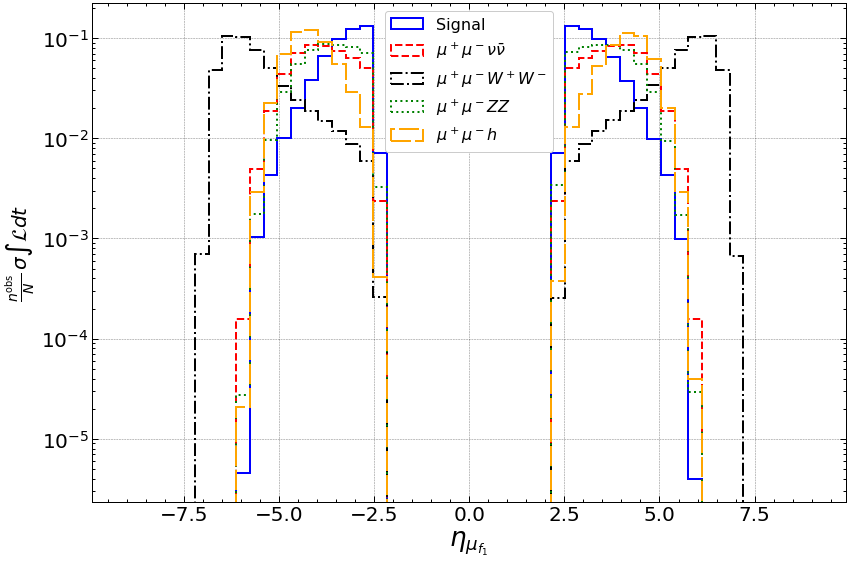

In [253]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_fmeta_1[:-1], bins_a0a0_fmeta_1, weights=signal_weights_fmeta_1, histtype='step', 
         color='blue', linewidth=2, label='Signal')

plt.hist(bins_nunu_fmeta_1[:-1], bins_nunu_fmeta_1, weights=weights_nunu_fmeta_1, histtype='step', 
         color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')
plt.hist(bins_wpwm_fmeta_1[:-1], bins_wpwm_fmeta_1, weights=weights_wpwm_fmeta_1, histtype='step', 
         color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')
plt.hist(bins_zz_fmeta_1[:-1], bins_zz_fmeta_1, weights=weights_zz_fmeta_1, histtype='step', 
         color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')
plt.hist(bins_h_fmeta_1[:-1], bins_h_fmeta_1, weights=weights_h_fmeta_1, histtype='step', 
         color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel("$\eta_{\mu_{f_1}}$", fontsize=26)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)
# plt.title("Signal Distribution", fontsize=18)  

plt.yscale('log')
#plt.xlim(-7, 7)


#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16, loc='best')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

In [254]:
# plt.figure(figsize=(12, 8))

# plt.hist(bins_a0a0_fmeta_2[:-1], bins_a0a0_fmeta_2, weights=signal_weights_fmeta_2, histtype='step', 
#          color='blue', linewidth=2, label='$\mu^+\mu^- a_0a_0$')

# plt.hist(bins_nunu_fmeta_2[:-1], bins_nunu_fmeta_2, weights=weights_nunu_fmeta_2, histtype='step', 
#          color='red', linewidth=2, label=r'$\mu^+ \mu^- \nu \bar{\nu}$')
# plt.hist(bins_wpwm_fmeta_2[:-1], bins_wpwm_fmeta_2, weights=weights_wpwm_fmeta_2, histtype='step', 
#          color='black', linewidth=2, label='$\mu^+\mu^- W^+W^-$')
# plt.hist(bins_zz_fmeta_2[:-1], bins_zz_fmeta_2, weights=weights_zz_fmeta_2, histtype='step', 
#          color='green', linewidth=2, label='$\mu^+\mu^- ZZ$')
# plt.hist(bins_h_fmeta_2[:-1], bins_h_fmeta_2, weights=weights_h_fmeta_2, histtype='step', 
#          color='orange', linewidth=2, label='$\mu^+\mu^- h$')

# plt.xlabel("|$\eta_2$|", fontsize=16)
# plt.ylabel("Number of Events", fontsize=16)
# # plt.title("Signal Distribution", fontsize=18)  

# plt.yscale('log')


# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.legend(fontsize=14, loc='best')

# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# plt.tight_layout()
# plt.show()

# 4) $\Delta \eta$

In [255]:
bin4 = 100
min4 = 5
max4 = 20

In [256]:
a0a0_del_fmeta = np.array(df_a0a0['del_fmeta'])
counts_a0a0_del_fmeta, bins_a0a0_del_fmeta = np.histogram(a0a0_del_fmeta, bins=bin4, range = (min4, max4))
weights_a0a0_del_fmeta = sf_a0a0_1 * counts_a0a0_del_fmeta

In [257]:
h0h0_del_fmeta = np.array(df_h0h0['del_fmeta'])
counts_h0h0_del_fmeta, bins_h0h0_del_fmeta = np.histogram(h0h0_del_fmeta, bins=bin4, range = (min4, max4))
weights_h0h0_del_fmeta = sf_h0h0_1 * counts_h0h0_del_fmeta

In [258]:
hphm_del_fmeta = np.array(df_hphm['del_fmeta'])
counts_hphm_del_fmeta, bins_hphm_del_fmeta = np.histogram(hphm_del_fmeta, bins=bin4, range = (min4, max4))
weights_hphm_del_fmeta = sf_hphm_1 * counts_hphm_del_fmeta

In [260]:
signal_weights_del_fmeta = (counts_a0a0_del_fmeta + counts_h0h0_del_fmeta + counts_hphm_del_fmeta)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [261]:
sum(signal_weights_del_fmeta)

0.9999999999999998

In [262]:
nunu_del_fmeta = np.array(df_nunu['del_fmeta'])
counts_nunu_del_fmeta, bins_nunu_del_fmeta = np.histogram(nunu_del_fmeta, bins=bin4, range = (min4, max4))
weights_nunu_del_fmeta = sf_nunu * counts_nunu_del_fmeta

wpwm_del_fmeta = np.array(df_wpwm['del_fmeta'])
counts_wpwm_del_fmeta, bins_wpwm_del_fmeta = np.histogram(wpwm_del_fmeta, bins=bin4, range = (min4, max4))
weights_wpwm_del_fmeta = sf_wpwm * counts_wpwm_del_fmeta

zz_del_fmeta = np.array(df_zz['del_fmeta'])
counts_zz_del_fmeta, bins_zz_del_fmeta = np.histogram(zz_del_fmeta, bins=bin4, range = (min4, max4))
weights_zz_del_fmeta = sf_zz * counts_zz_del_fmeta

h_del_fmeta = np.array(df_h['del_fmeta'])
counts_h_del_fmeta, bins_h_del_fmeta = np.histogram(h_del_fmeta, bins=bin4, range = (min4, max4))
weights_h_del_fmeta = sf_h * counts_h_del_fmeta

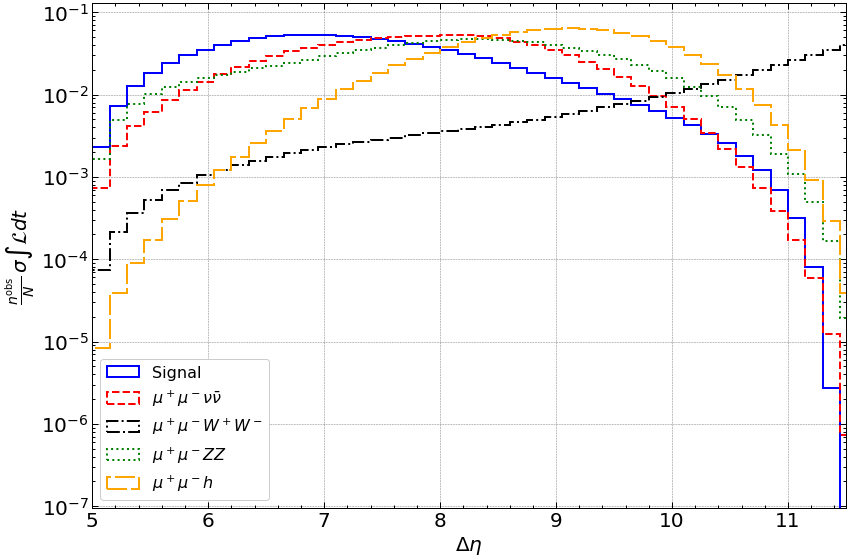

In [263]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_del_fmeta[:-1], bins_a0a0_del_fmeta, weights=signal_weights_del_fmeta, 
         histtype='step', color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_del_fmeta[:-1], bins_nunu_del_fmeta, weights=weights_nunu_del_fmeta, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_del_fmeta[:-1], bins_wpwm_del_fmeta, weights=weights_wpwm_del_fmeta, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_del_fmeta[:-1], bins_zz_del_fmeta, weights=weights_zz_del_fmeta, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_del_fmeta[:-1], bins_h_del_fmeta, weights=weights_h_del_fmeta, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel("$\Delta \eta$", fontsize=20)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)
# plt.title("Signal and Background Distributions", fontsize=18)

plt.yscale('log')
plt.xlim(5, 11.5)

#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16, loc='best')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout()
plt.show()

# 5) $\Delta \phi$

In [264]:
bin5 = 50
min5 = 0
max5 = np.pi

In [265]:
np.sum(counts_a0a0_del_phi)

4492634

In [266]:
a0a0_del_phi = np.array(df_a0a0['del_phi'])
counts_a0a0_del_phi, bins_a0a0_del_phi = np.histogram(a0a0_del_phi, bins=bin5, range=(min5, max5))
weights_a0a0_del_phi = sf_a0a0_1 * counts_a0a0_del_phi
weights_a0a0_del_phi = sf_a0a0_1 * counts_a0a0_del_phi

h0h0_del_phi = np.array(df_h0h0['del_phi'])
counts_h0h0_del_phi, bins_h0h0_del_phi = np.histogram(h0h0_del_phi, bins=bin5, range=(min5, max5))
weights_h0h0_del_phi = sf_h0h0_1 * counts_h0h0_del_phi

hphm_del_phi = np.array(df_hphm['del_phi'])
counts_hphm_del_phi, bins_hphm_del_phi = np.histogram(hphm_del_phi, bins=bin5, range=(min5, max5))
weights_hphm_del_phi = sf_hphm_1 * counts_hphm_del_phi

In [268]:
signal_weights_del_phi = (counts_a0a0_del_phi + counts_h0h0_del_phi + counts_hphm_del_phi)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [269]:
signal_weights_del_phi.sum()

1.0

In [270]:
nunu_del_phi = np.array(df_nunu['del_phi'])
counts_nunu_del_phi, bins_nunu_del_phi = np.histogram(nunu_del_phi, bins=bin5, range=(min5, max5))
# weights_nunu_del_phi = sf_nunu * counts_nunu_del_phi
weights_nunu_del_phi = (1/np.sum(counts_nunu_del_phi)) * counts_nunu_del_phi

wpwm_del_phi = np.array(df_wpwm['del_phi'])
counts_wpwm_del_phi, bins_wpwm_del_phi = np.histogram(wpwm_del_phi, bins=bin5, range=(min5, max5))
weights_wpwm_del_phi = sf_wpwm * counts_wpwm_del_phi

zz_del_phi = np.array(df_zz['del_phi'])
counts_zz_del_phi, bins_zz_del_phi = np.histogram(zz_del_phi, bins=bin5, range=(min5, max5))
weights_zz_del_phi = sf_zz * counts_zz_del_phi

h_del_phi = np.array(df_h['del_phi'])
counts_h_del_phi, bins_h_del_phi = np.histogram(h_del_phi, bins=bin5, range=(min5, max5))
weights_h_del_phi = sf_h * counts_h_del_phi

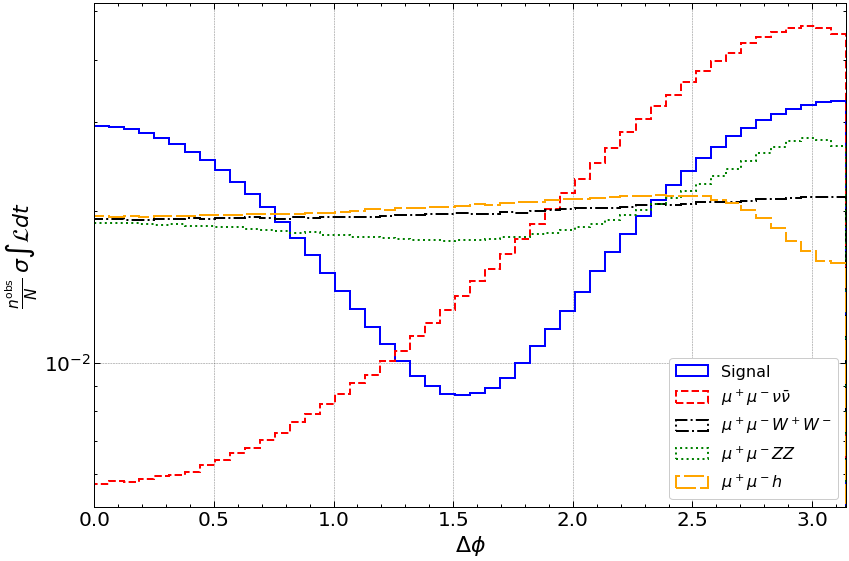

In [308]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_del_phi[:-1], bins_a0a0_del_phi, weights=signal_weights_del_phi, 
         histtype='step', color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_del_phi[:-1], bins_nunu_del_phi, weights=weights_nunu_del_phi, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_del_phi[:-1], bins_wpwm_del_phi, weights=weights_wpwm_del_phi, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_del_phi[:-1], bins_zz_del_phi, weights=weights_zz_del_phi, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_del_phi[:-1], bins_h_del_phi, weights=weights_h_del_phi, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel("$\Delta \phi$", fontsize=22)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=22)
# plt.title("Signal and Background Distributions", fontsize=18)

plt.yscale('log')
plt.xlim(0, np.pi)
#plt.ylim(10e-2, 10e+2)

#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16, loc="best")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout()
plt.show()

In [272]:
np.sum(weights_nunu_del_phi)

1.0

# 6) $\Delta R$

In [273]:
bin6 = 50
min6 = 5
max6 = 14

In [274]:
a0a0_delR_fm = np.array(df_a0a0['delR_fm'])
counts_a0a0_delR_fm, bins_a0a0_delR_fm = np.histogram(a0a0_delR_fm, bins=bin6, range=(min6, max6))
weights_a0a0_delR_fm = sf_a0a0_1 * counts_a0a0_delR_fm

h0h0_delR_fm = np.array(df_h0h0['delR_fm'])
counts_h0h0_delR_fm, bins_h0h0_delR_fm = np.histogram(h0h0_delR_fm, bins=bin6, range=(min6, max6))
weights_h0h0_delR_fm = sf_h0h0_1 * counts_h0h0_delR_fm

hphm_delR_fm = np.array(df_hphm['delR_fm'])
counts_hphm_delR_fm, bins_hphm_delR_fm = np.histogram(hphm_delR_fm, bins=bin6, range=(min6, max6))
weights_hphm_delR_fm = sf_hphm_1 * counts_hphm_delR_fm

In [275]:
signal_weights_delR_fm = (counts_a0a0_delR_fm + counts_h0h0_delR_fm + counts_hphm_delR_fm)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [276]:
nunu_delR_fm = np.array(df_nunu['delR_fm'])
counts_nunu_delR_fm, bins_nunu_delR_fm = np.histogram(nunu_delR_fm, bins=bin6, range=(min6, max6))
weights_nunu_delR_fm = sf_nunu * counts_nunu_delR_fm

wpwm_delR_fm = np.array(df_wpwm['delR_fm'])
counts_wpwm_delR_fm, bins_wpwm_delR_fm = np.histogram(wpwm_delR_fm, bins=bin6, range=(min6, max6))
weights_wpwm_delR_fm = sf_wpwm * counts_wpwm_delR_fm

zz_delR_fm = np.array(df_zz['delR_fm'])
counts_zz_delR_fm, bins_zz_delR_fm = np.histogram(zz_delR_fm, bins=bin6, range=(min6, max6))
weights_zz_delR_fm = sf_zz * counts_zz_delR_fm

h_delR_fm = np.array(df_h['delR_fm'])
counts_h_delR_fm, bins_h_delR_fm = np.histogram(h_delR_fm, bins=bin6, range=(min6, max6))
weights_h_delR_fm = sf_h * counts_h_delR_fm

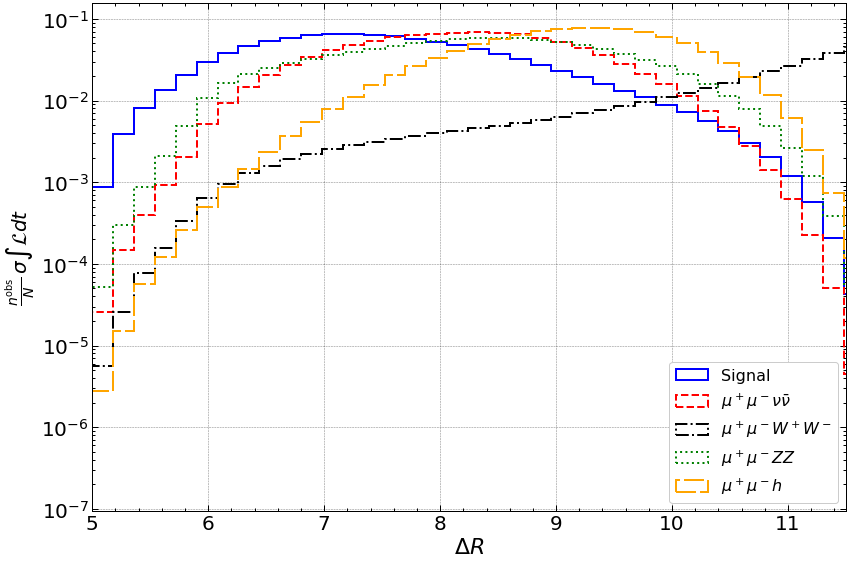

In [277]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_delR_fm[:-1], bins_a0a0_delR_fm, weights=signal_weights_delR_fm, 
         histtype='step', color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_delR_fm[:-1], bins_nunu_delR_fm, weights=weights_nunu_delR_fm, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_delR_fm[:-1], bins_wpwm_delR_fm, weights=weights_wpwm_delR_fm, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_delR_fm[:-1], bins_zz_delR_fm, weights=weights_zz_delR_fm, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_delR_fm[:-1], bins_h_delR_fm, weights=weights_h_delR_fm, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel("$\Delta R$", fontsize=22)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)
# plt.title("Signal and Background Distributions", fontsize=18)

plt.yscale('log')
plt.xlim(5, 11.5)


#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16, loc='best')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

# 7) $E^{min}_\mu$

In [278]:
bin7 = 50
min7 = 500
max7 = 6000

In [279]:
a0a0_Emin_fm = np.array(df_a0a0['Emin_fm'])
counts_a0a0_Emin_fm, bins_a0a0_Emin_fm = np.histogram(a0a0_Emin_fm, bins=bin7, range=(min7, max7))
weights_a0a0_Emin_fm = sf_a0a0_1 * counts_a0a0_Emin_fm

h0h0_Emin_fm = np.array(df_h0h0['Emin_fm'])
counts_h0h0_Emin_fm, bins_h0h0_Emin_fm = np.histogram(h0h0_Emin_fm, bins=bin7, range=(min7, max7))
weights_h0h0_Emin_fm = sf_h0h0_1 * counts_h0h0_Emin_fm

hphm_Emin_fm = np.array(df_hphm['Emin_fm'])
counts_hphm_Emin_fm, bins_hphm_Emin_fm = np.histogram(hphm_Emin_fm, bins=bin7, range=(min7, max7))
weights_hphm_Emin_fm = sf_hphm_1 * counts_hphm_Emin_fm

In [280]:
signal_weights_Emin_fm = (counts_a0a0_Emin_fm + counts_h0h0_Emin_fm + counts_hphm_Emin_fm)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [281]:
nunu_Emin_fm = np.array(df_nunu['Emin_fm'])
counts_nunu_Emin_fm, bins_nunu_Emin_fm = np.histogram(nunu_Emin_fm, bins=bin7, range=(min7, max7))
weights_nunu_Emin_fm = sf_nunu * counts_nunu_Emin_fm

wpwm_Emin_fm = np.array(df_wpwm['Emin_fm'])
counts_wpwm_Emin_fm, bins_wpwm_Emin_fm = np.histogram(wpwm_Emin_fm, bins=bin7, range=(min7, max7))
weights_wpwm_Emin_fm = sf_wpwm * counts_wpwm_Emin_fm

zz_Emin_fm = np.array(df_zz['Emin_fm'])
counts_zz_Emin_fm, bins_zz_Emin_fm = np.histogram(zz_Emin_fm, bins=bin7, range=(min7, max7))
weights_zz_Emin_fm = sf_zz * counts_zz_Emin_fm

h_Emin_fm = np.array(df_h['Emin_fm'])
counts_h_Emin_fm, bins_h_Emin_fm = np.histogram(h_Emin_fm, bins=bin7, range=(min7, max7))
weights_h_Emin_fm = sf_h * counts_h_Emin_fm

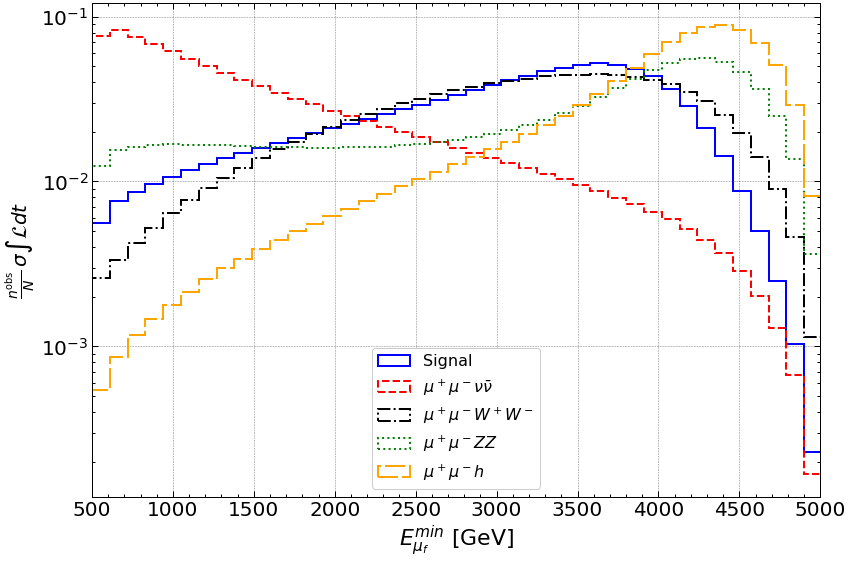

In [282]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_Emin_fm[:-1], bins_a0a0_Emin_fm, weights=signal_weights_Emin_fm, 
         histtype='step', color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_Emin_fm[:-1], bins_nunu_Emin_fm, weights=weights_nunu_Emin_fm, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_Emin_fm[:-1], bins_wpwm_Emin_fm, weights=weights_wpwm_Emin_fm, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_Emin_fm[:-1], bins_zz_Emin_fm, weights=weights_zz_Emin_fm, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_Emin_fm[:-1], bins_h_Emin_fm, weights=weights_h_Emin_fm, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')


plt.xlabel("$E^{min}_{\mu_f}$ [GeV]", fontsize=22)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)
# plt.title("Signal and Background Distributions", fontsize=18)


plt.yscale('log')
plt.xlim(500,5000)

#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=16, loc='best')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

# 8) $E^{max}_\mu$

In [283]:
bin8 = 50
min8 = 500
max8 = 8500

In [284]:
a0a0_Emax_fm = np.array(df_a0a0['Emax_fm'])
counts_a0a0_Emax_fm, bins_a0a0_Emax_fm = np.histogram(a0a0_Emax_fm, bins=bin8, range=(min8, max8))
weights_a0a0_Emax_fm = sf_a0a0_1 * counts_a0a0_Emax_fm

h0h0_Emax_fm = np.array(df_h0h0['Emax_fm'])
counts_h0h0_Emax_fm, bins_h0h0_Emax_fm = np.histogram(h0h0_Emax_fm, bins=bin8, range=(min8, max8))
weights_h0h0_Emax_fm = sf_h0h0_1 * counts_h0h0_Emax_fm

hphm_Emax_fm = np.array(df_hphm['Emax_fm'])
counts_hphm_Emax_fm, bins_hphm_Emax_fm = np.histogram(hphm_Emax_fm, bins=bin8, range=(min8, max8))
weights_hphm_Emax_fm = sf_hphm_1 * counts_hphm_Emax_fm

In [285]:
signal_weights_Emax_fm = (counts_a0a0_Emax_fm + counts_h0h0_Emax_fm + counts_hphm_Emax_fm)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [286]:
nunu_Emax_fm = np.array(df_nunu['Emax_fm'])
counts_nunu_Emax_fm, bins_nunu_Emax_fm = np.histogram(nunu_Emax_fm, bins=bin8, range=(min8, max8))
weights_nunu_Emax_fm = sf_nunu * counts_nunu_Emax_fm

wpwm_Emax_fm = np.array(df_wpwm['Emax_fm'])
counts_wpwm_Emax_fm, bins_wpwm_Emax_fm = np.histogram(wpwm_Emax_fm, bins=bin8, range=(min8, max8))
weights_wpwm_Emax_fm = sf_wpwm * counts_wpwm_Emax_fm

zz_Emax_fm = np.array(df_zz['Emax_fm'])
counts_zz_Emax_fm, bins_zz_Emax_fm = np.histogram(zz_Emax_fm, bins=bin8, range=(min8, max8))
weights_zz_Emax_fm = sf_zz * counts_zz_Emax_fm

h_Emax_fm = np.array(df_h['Emax_fm'])
counts_h_Emax_fm, bins_h_Emax_fm = np.histogram(h_Emax_fm, bins=bin8, range=(min8, max8))
weights_h_Emax_fm = sf_h * counts_h_Emax_fm

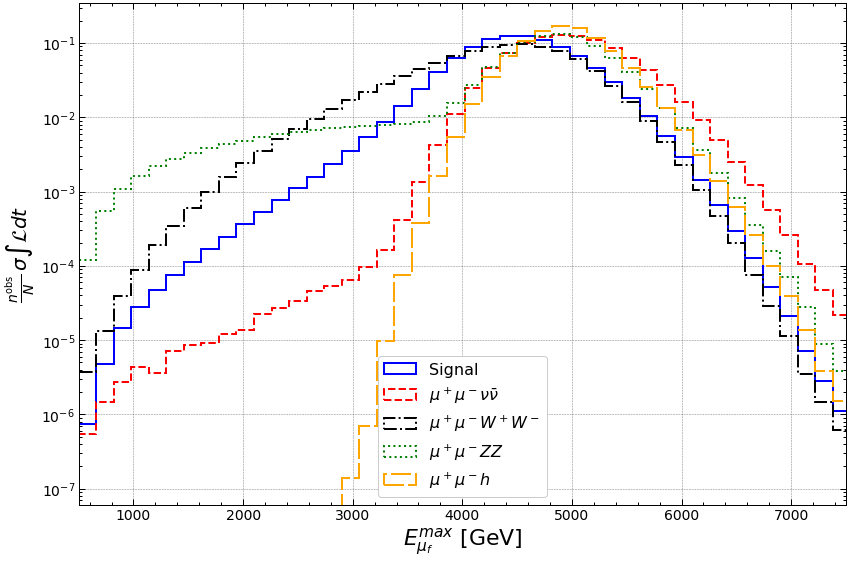

In [287]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_Emax_fm[:-1], bins_a0a0_Emax_fm, weights=signal_weights_Emax_fm, 
         histtype='step', color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_Emax_fm[:-1], bins_nunu_Emax_fm, weights=weights_nunu_Emax_fm, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_Emax_fm[:-1], bins_wpwm_Emax_fm, weights=weights_wpwm_Emax_fm, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_Emax_fm[:-1], bins_zz_Emax_fm, weights=weights_zz_Emax_fm, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_Emax_fm[:-1], bins_h_Emax_fm, weights=weights_h_Emax_fm, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel("$E^{max}_{\mu_f}$ [GeV]", fontsize=22)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)

plt.yscale('log')
plt.xlim(500, 7500)

plt.legend(fontsize=16, loc='best')
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

# 9) $P^{\mu \mu}_T$

In [288]:
bin9 = 50
min9 = 0
max9 = 1600

In [289]:
a0a0_PT_fm = np.array(df_a0a0['PT_fm'])
counts_a0a0_PT_fm, bins_a0a0_PT_fm = np.histogram(a0a0_PT_fm, bins=bin9, range=(min9, max9))
weights_a0a0_PT_fm = sf_a0a0_1 * counts_a0a0_PT_fm

h0h0_PT_fm = np.array(df_h0h0['PT_fm'])
counts_h0h0_PT_fm, bins_h0h0_PT_fm = np.histogram(h0h0_PT_fm, bins=bin9, range=(min9, max9))
weights_h0h0_PT_fm = sf_h0h0_1 * counts_h0h0_PT_fm

hphm_PT_fm = np.array(df_hphm['PT_fm'])
counts_hphm_PT_fm, bins_hphm_PT_fm = np.histogram(hphm_PT_fm, bins=bin9, range=(min9, max9))
weights_hphm_PT_fm = sf_hphm_1 * counts_hphm_PT_fm

In [290]:
signal_weights_PT_fm = (counts_a0a0_PT_fm + counts_h0h0_PT_fm + counts_hphm_PT_fm)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [291]:
nunu_PT_fm = np.array(df_nunu['PT_fm'])
counts_nunu_PT_fm, bins_nunu_PT_fm = np.histogram(nunu_PT_fm, bins=bin9, range=(min9, max9))
weights_nunu_PT_fm = sf_nunu * counts_nunu_PT_fm

wpwm_PT_fm = np.array(df_wpwm['PT_fm'])
counts_wpwm_PT_fm, bins_wpwm_PT_fm = np.histogram(wpwm_PT_fm, bins=bin9, range=(min9, max9))
weights_wpwm_PT_fm = sf_wpwm * counts_wpwm_PT_fm

zz_PT_fm = np.array(df_zz['PT_fm'])
counts_zz_PT_fm, bins_zz_PT_fm = np.histogram(zz_PT_fm, bins=bin9, range=(min9, max9))
weights_zz_PT_fm = sf_zz * counts_zz_PT_fm

h_PT_fm = np.array(df_h['PT_fm'])
counts_h_PT_fm, bins_h_PT_fm = np.histogram(h_PT_fm, bins=bin9, range=(min9, max9))
weights_h_PT_fm = sf_h * counts_h_PT_fm

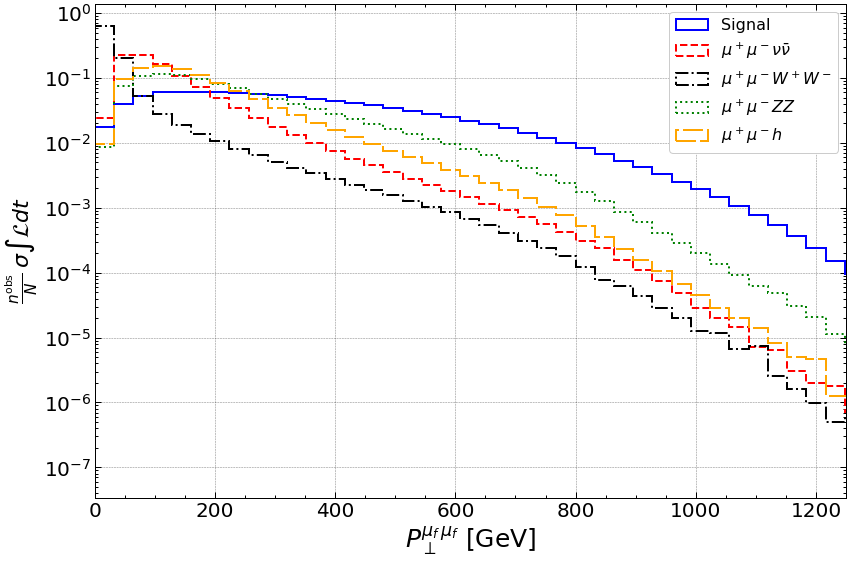

In [292]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_PT_fm[:-1], bins_a0a0_PT_fm, weights=signal_weights_PT_fm, 
         histtype='step', color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_PT_fm[:-1], bins_nunu_PT_fm, weights=weights_nunu_PT_fm, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_PT_fm[:-1], bins_wpwm_PT_fm, weights=weights_wpwm_PT_fm, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_PT_fm[:-1], bins_zz_PT_fm, weights=weights_zz_PT_fm, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_PT_fm[:-1], bins_h_PT_fm, weights=weights_h_PT_fm, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel(r'$P^{\mu_f \, \mu_f}_\perp$ [GeV]', fontsize=25)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=22)

plt.yscale('log')
plt.xlim(0, 1250)

plt.legend(fontsize=16, loc='best')
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()


# 10) MET

In [293]:
bin10 = 50
min10 = 0
max10 = 1500

In [294]:
a0a0_MET = np.array(df_a0a0['MET'])
counts_a0a0_MET, bins_a0a0_MET = np.histogram(a0a0_MET, bins=bin10, range=(min10, max10))
weights_a0a0_MET = sf_a0a0_1 * counts_a0a0_MET

h0h0_MET = np.array(df_h0h0['MET'])
counts_h0h0_MET, bins_h0h0_MET = np.histogram(h0h0_MET, bins=bin10, range=(min10, max10))
weights_h0h0_MET = sf_h0h0_1 * counts_h0h0_MET

hphm_MET = np.array(df_hphm['MET'])
counts_hphm_MET, bins_hphm_MET = np.histogram(hphm_MET, bins=bin10, range=(min10, max10))
weights_hphm_MET = sf_hphm_1 * counts_hphm_MET

In [295]:
signal_weights_MET = (counts_a0a0_MET + counts_h0h0_MET + counts_hphm_MET)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [296]:
nunu_MET = np.array(df_nunu['MET'])
counts_nunu_MET, bins_nunu_MET = np.histogram(nunu_MET, bins=bin10, range=(min10, max10))
weights_nunu_MET = sf_nunu * counts_nunu_MET

wpwm_MET = np.array(df_wpwm['MET'])
counts_wpwm_MET, bins_wpwm_MET = np.histogram(wpwm_MET, bins=bin10, range=(min10, max10))
weights_wpwm_MET = sf_wpwm * counts_wpwm_MET

zz_MET = np.array(df_zz['MET'])
counts_zz_MET, bins_zz_MET = np.histogram(zz_MET, bins=bin10, range=(min10, max10))
weights_zz_MET = sf_zz * counts_zz_MET

h_MET = np.array(df_h['MET'])
counts_h_MET, bins_h_MET = np.histogram(h_MET, bins=bin10, range=(min10, max10))
weights_h_MET = sf_h * counts_h_MET

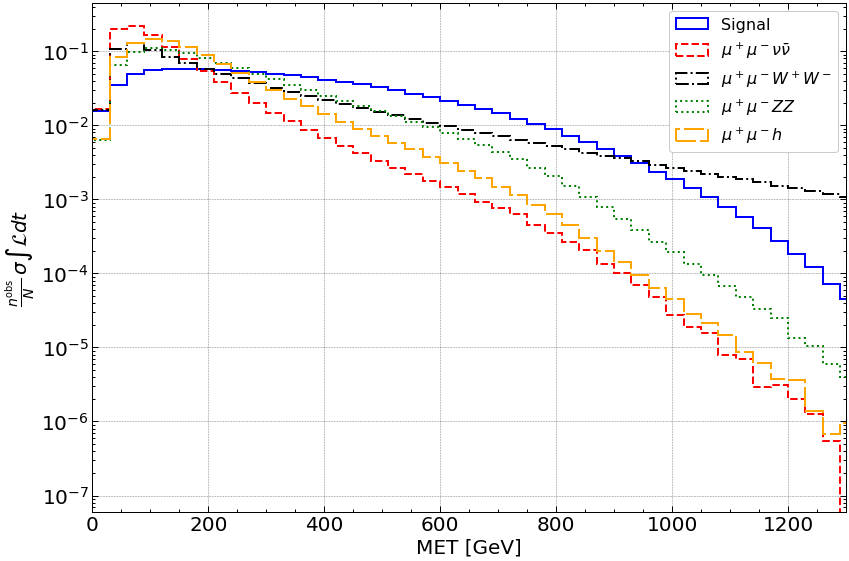

In [306]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_MET[:-1], bins_a0a0_MET, weights=signal_weights_MET, 
         histtype='step', color='blue', linewidth=2, linestyle='-',label='Signal')

plt.hist(bins_nunu_MET[:-1], bins_nunu_MET, weights=weights_nunu_MET, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_MET[:-1], bins_wpwm_MET, weights=weights_wpwm_MET, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_MET[:-1], bins_zz_MET, weights=weights_zz_MET, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_MET[:-1], bins_h_MET, weights=weights_h_MET, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel("MET [GeV]", fontsize=20)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=20)
#plt.title("Signal and Background MET Distribution", fontsize=18)

plt.yscale('log')
plt.xlim(0, 1300)

plt.legend(fontsize=16, loc='best')
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

# 11) E_total

In [298]:
bin11 = 50
min11 = 500
max11 = 10000

In [299]:
a0a0_totE_fm = np.array(df_a0a0['totE_fm'])
counts_a0a0_totE_fm, bins_a0a0_totE_fm = np.histogram(a0a0_totE_fm, bins=bin11, range=(min11, max11))
weights_a0a0_totE_fm = sf_a0a0_1 * counts_a0a0_totE_fm

h0h0_totE_fm = np.array(df_h0h0['totE_fm'])
counts_h0h0_totE_fm, bins_h0h0_totE_fm = np.histogram(h0h0_totE_fm, bins=bin11, range=(min11, max11))
weights_h0h0_totE_fm = sf_h0h0_1 * counts_h0h0_totE_fm

hphm_totE_fm = np.array(df_hphm['totE_fm'])
counts_hphm_totE_fm, bins_hphm_totE_fm = np.histogram(hphm_totE_fm, bins=bin11, range=(min11, max11))
weights_hphm_totE_fm = sf_hphm_1 * counts_hphm_totE_fm

In [300]:
signal_weights_totE_fm = (counts_a0a0_totE_fm + counts_h0h0_totE_fm + counts_hphm_totE_fm)/(len(df_a0a0)+len(df_h0h0)+len(df_hphm))


In [301]:
nunu_totE_fm = np.array(df_nunu['totE_fm'])
counts_nunu_totE_fm, bins_nunu_totE_fm = np.histogram(nunu_totE_fm, bins=bin11, range=(min11, max11))
weights_nunu_totE_fm = sf_nunu * counts_nunu_totE_fm

wpwm_totE_fm = np.array(df_wpwm['totE_fm'])
counts_wpwm_totE_fm, bins_wpwm_totE_fm = np.histogram(wpwm_totE_fm, bins=bin11, range=(min11, max11))
weights_wpwm_totE_fm = sf_wpwm * counts_wpwm_totE_fm

zz_totE_fm = np.array(df_zz['totE_fm'])
counts_zz_totE_fm, bins_zz_totE_fm = np.histogram(zz_totE_fm, bins=bin11, range=(min11, max11))
weights_zz_totE_fm = sf_zz * counts_zz_totE_fm

h_totE_fm = np.array(df_h['totE_fm'])
counts_h_totE_fm, bins_h_totE_fm = np.histogram(h_totE_fm, bins=bin11, range=(min11, max11))
weights_h_totE_fm = sf_h * counts_h_totE_fm

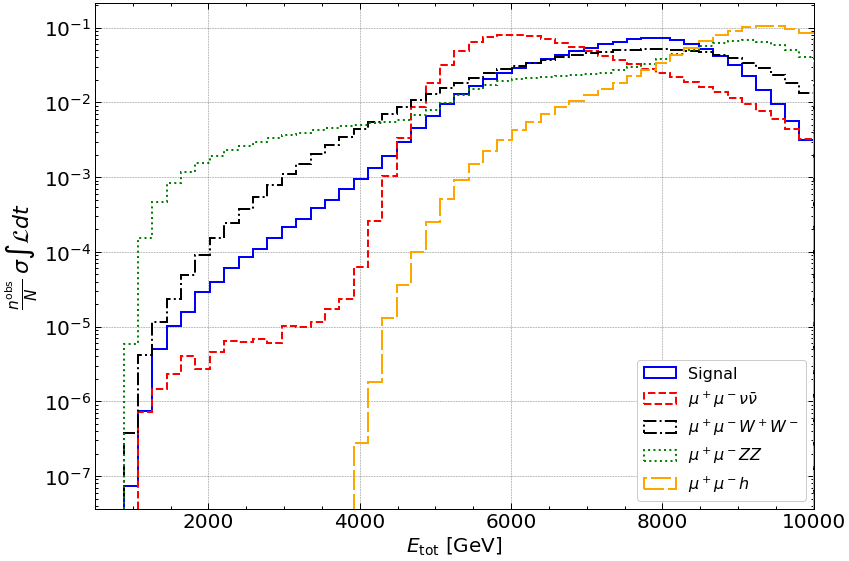

In [303]:
plt.figure(figsize=(12, 8))

plt.hist(bins_a0a0_totE_fm[:-1], bins_a0a0_totE_fm, weights=signal_weights_totE_fm, 
         histtype='step', color='blue', linewidth=2, linestyle='-', label='Signal')

plt.hist(bins_nunu_totE_fm[:-1], bins_nunu_totE_fm, weights=weights_nunu_totE_fm, 
         histtype='step', color='red', linewidth=2, linestyle='--', label=r'$\mu^+ \mu^- \nu \bar{\nu}$')

plt.hist(bins_wpwm_totE_fm[:-1], bins_wpwm_totE_fm, weights=weights_wpwm_totE_fm, 
         histtype='step', color='black', linewidth=2, linestyle='-.', label='$\mu^+\mu^- W^+W^-$')

plt.hist(bins_zz_totE_fm[:-1], bins_zz_totE_fm, weights=weights_zz_totE_fm, 
         histtype='step', color='green', linewidth=2, linestyle=':', label='$\mu^+\mu^- ZZ$')

plt.hist(bins_h_totE_fm[:-1], bins_h_totE_fm, weights=weights_h_totE_fm, 
         histtype='step', color='orange', linewidth=2, linestyle=(0, (10, 2)), label='$\mu^+\mu^- h$')

plt.xlabel(r'$E_{\rm tot}$ [GeV]', fontsize=20)
plt.ylabel(r'$\frac{n^{\rm obs}}{N}\, \sigma \int \mathcal{L} dt$', fontsize=22)

plt.yscale('log')
plt.xlim(500, 10000)

plt.legend(fontsize=16, loc='best')
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()